# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 31: Hierarchical Portfolios with Custom Covariance

## 1. Downloading the data:

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets =  ['IEUR', 'IPAC', 'IVV', 'EWC', 'SCZ', 'IJR', 'XCS.TO', 'EIMI.L']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  8 of 8 completed


In [3]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,EIMI.L,EWC,IEUR,IJR,IPAC,IVV,SCZ,XCS.TO
Date,,,,,,,,
2016-01-05,0.8804%,-0.4719%,-0.6498%,0.3069%,0.5109%,0.2079%,-0.2627%,-0.2423%
2016-01-06,-1.1807%,-2.1811%,-1.7442%,-1.1402%,-1.9695%,-1.3091%,-1.6819%,-0.6478%
2016-01-07,-1.9740%,-2.3752%,-1.6741%,-2.5694%,-2.0955%,-2.3927%,-1.5252%,-2.4450%
2016-01-08,-2.0668%,-0.4468%,-1.0556%,-1.6651%,-1.4784%,-1.1077%,-1.3395%,0.0836%
2016-01-11,-0.7576%,-1.3466%,0.1521%,0.0098%,0.1792%,0.1037%,0.1697%,-3.6728%


In [4]:
# Load our custom estimates of input parameters

custom_cov = pd.read_excel('custom_posterior_cov.xlsx', engine='openpyxl', index_col=0)

display(custom_cov)

,IEUR,IPAC,IVV,EWC,SCZ,IJR,XCS.TO,EIMI.L
IEUR,3.6700%,2.3800%,3.7600%,3.6300%,3.2000%,4.4600%,3.8700%,2.3200%
IPAC,2.3800%,2.4000%,2.3500%,2.3100%,2.4000%,2.7900%,2.4200%,1.8100%
IVV,3.7600%,2.3500%,4.6400%,4.0700%,3.3000%,5.4800%,4.3800%,2.4200%
EWC,3.6300%,2.3100%,4.0700%,4.2300%,3.2600%,4.9500%,4.6000%,2.3400%
SCZ,3.2000%,2.4000%,3.3000%,3.2600%,3.0100%,4.0200%,3.5400%,2.1500%
IJR,4.4600%,2.7900%,5.4800%,4.9500%,4.0200%,6.6900%,5.4100%,2.8600%
XCS.TO,3.8700%,2.4200%,4.3800%,4.6000%,3.5400%,5.4100%,5.1700%,2.5700%
EIMI.L,2.3200%,1.8100%,2.4200%,2.3400%,2.1500%,2.8600%,2.5700%,2.2300%


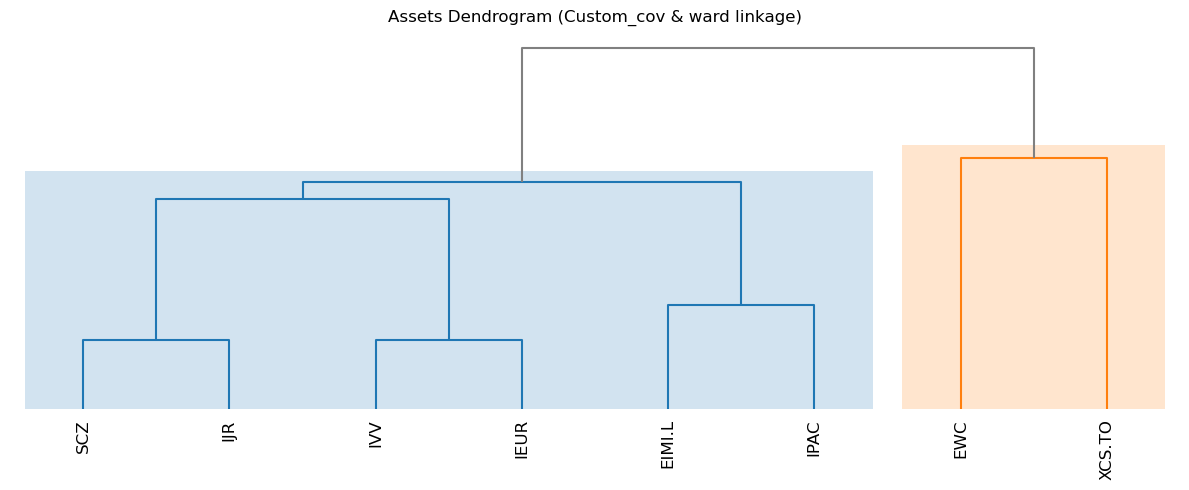

In [5]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_dendrogram(returns=Y,
                        custom_cov=custom_cov,
                        codependence='custom_cov',
                        linkage='ward',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

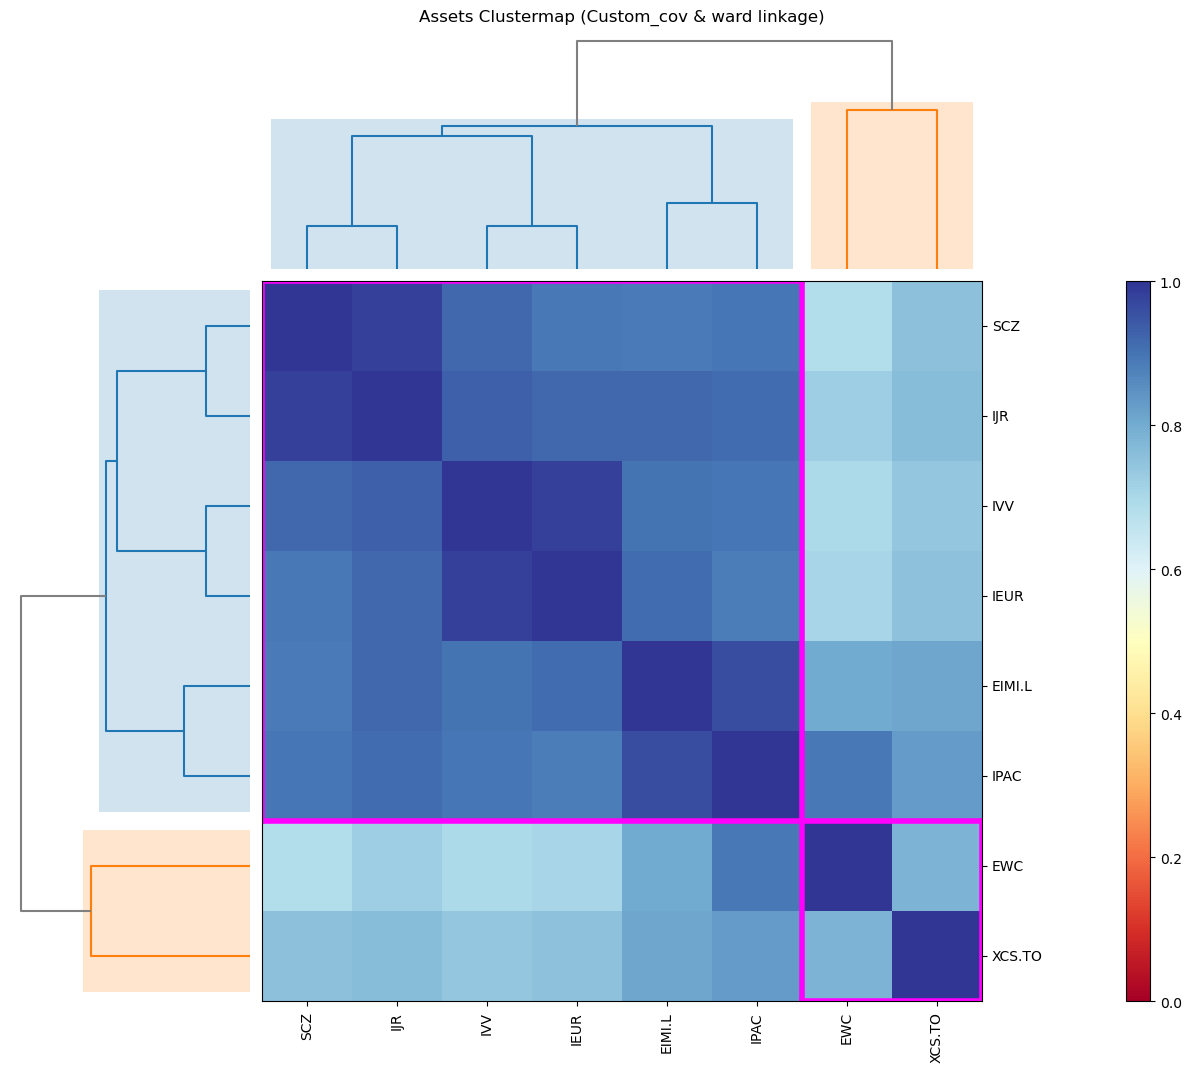

In [6]:
# Plotting Assets Clusters

ax = rp.plot_clusters(returns=Y,
                      custom_cov=custom_cov,
                      codependence='custom_cov',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

## 2. Estimating HERC Portfolio

This is the original model proposed by Raffinot (2018). Riskfolio-Lib expand this model to 14 risk measures.

### 2.1 Calculating the HERC portfolio

In [8]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='HERC' # Could be HRP or HERC
codependence = 'custom_cov' # Correlation matrix used to group assets in clusters
method_cov = 'custom_cov'
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      method_cov=method_cov,
                      custom_cov=custom_cov,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,EIMI.L,EWC,IEUR,IJR,IPAC,IVV,SCZ,XCS.TO
weights,17.7993%,11.0915%,6.6854%,3.6675%,16.5386%,5.2878%,8.1513%,9.0749%


### 2.2 Plotting portfolio composition

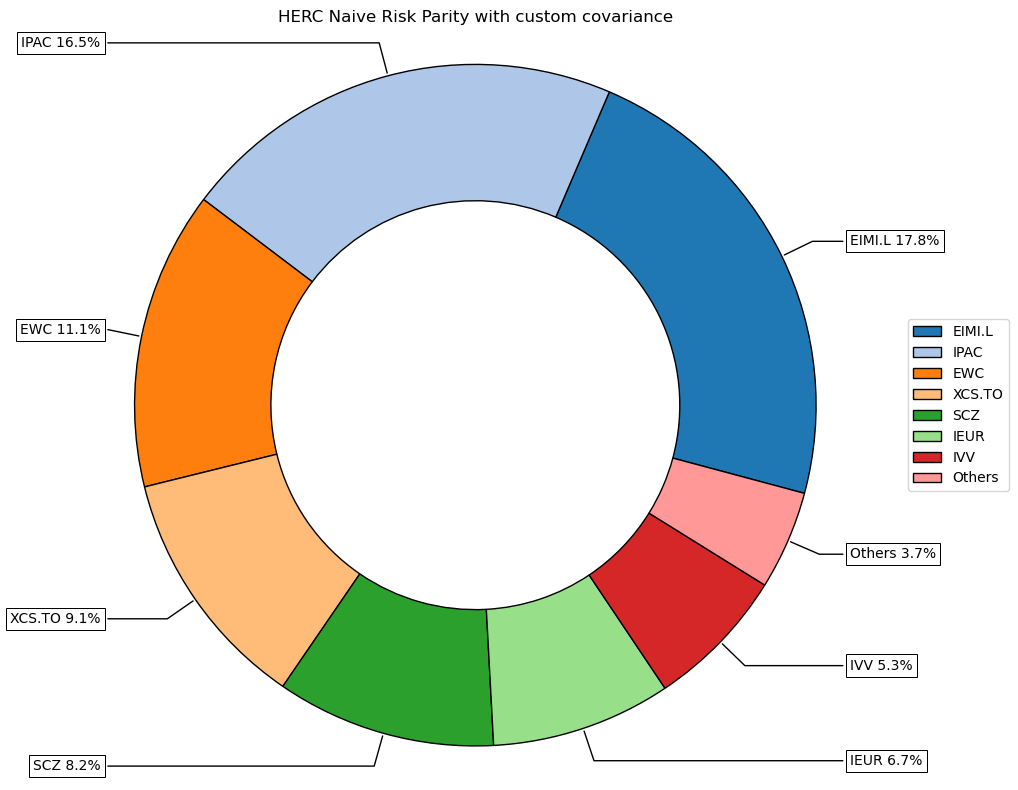

In [10]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HERC Naive Risk Parity with custom covariance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 2.3 Plotting Risk Contribution

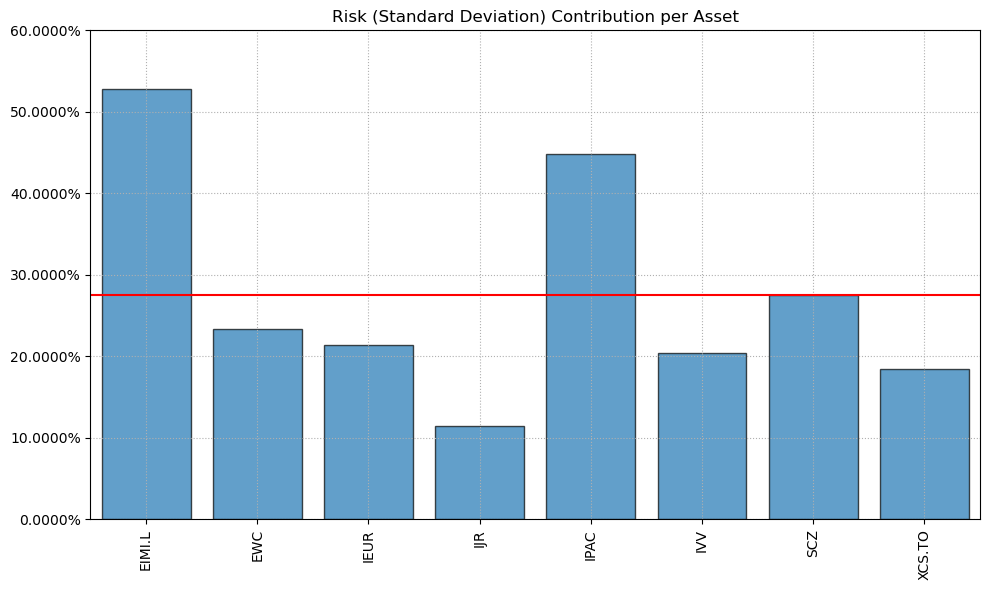

In [12]:
# Plotting the risk contribution per asset

ax = rp.plot_risk_con(w=w,
                      cov=custom_cov,
                      returns=Y,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

## 3. Estimating HERC Portfolio for Several Risk Measures

In [14]:
# Risk Measures available:
#
# 'vol': Standard Deviation.
# 'MV': Variance.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'VaR': Conditional Value at Risk.
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'DaR': Drawdown at Risk of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
# 'MDD_Rel': Maximum Drawdown of compounded cumulative returns (Calmar Ratio).
# 'ADD_Rel': Average Drawdown of compounded cumulative returns.
# 'DaR_Rel': Drawdown at Risk of compounded cumulative returns.
# 'CDaR_Rel': Conditional Drawdown at Risk of compounded cumulative returns.
# 'EDaR_Rel': Entropic Drawdown at Risk of compounded cumulative returns.
# 'UCI_Rel': Ulcer Index of compounded cumulative returns.

rms = ['vol', 'MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'VaR','CVaR', 'EVaR', 'WR', 'MDD', 'ADD',
       'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel', 'ADD_Rel',
       'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          codependence=codependence,
                          method_cov=method_cov,
                          custom_cov=custom_cov,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [15]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,vol,MV,MAD,MSV,FLPM,SLPM,VaR,CVaR,EVaR,WR,MDD,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,EDaR_Rel,UCI_Rel
EIMI.L,21.18%,17.80%,21.69%,21.43%,21.84%,21.47%,20.81%,21.71%,19.80%,17.87%,23.32%,22.67%,21.14%,21.58%,22.27%,21.19%,23.39%,22.59%,20.84%,21.59%,22.29%,21.07%
EWC,9.88%,11.09%,7.95%,8.73%,7.90%,8.76%,8.19%,8.82%,12.35%,14.19%,8.57%,7.55%,8.92%,8.71%,8.58%,8.75%,8.55%,7.62%,8.96%,8.75%,8.61%,8.87%
IEUR,7.55%,6.69%,8.54%,7.66%,8.47%,7.59%,8.95%,7.83%,3.75%,2.75%,8.87%,7.52%,7.32%,7.70%,8.34%,7.59%,8.74%,7.32%,7.31%,7.70%,8.23%,7.45%
IJR,5.59%,3.67%,7.10%,7.38%,7.15%,7.43%,7.29%,7.52%,7.41%,6.72%,7.23%,8.45%,7.71%,7.67%,7.49%,7.77%,7.43%,8.42%,7.64%,7.69%,7.60%,7.71%
IPAC,20.41%,16.54%,29.77%,28.27%,30.03%,28.26%,30.34%,27.64%,22.14%,19.16%,28.87%,37.56%,33.27%,31.89%,30.84%,34.57%,28.32%,36.39%,32.28%,31.03%,30.13%,33.72%
IVV,6.72%,5.29%,9.93%,9.00%,10.37%,9.09%,9.13%,8.29%,8.10%,7.33%,10.75%,20.14%,14.51%,13.49%,12.34%,16.17%,10.48%,19.70%,14.03%,12.96%,11.98%,15.88%
SCZ,8.34%,8.15%,9.21%,8.51%,9.21%,8.47%,9.36%,8.53%,4.88%,3.62%,7.56%,6.60%,6.45%,6.81%,7.22%,6.42%,7.65%,6.69%,6.60%,6.94%,7.29%,6.47%
XCS.TO,8.93%,9.07%,7.78%,8.63%,7.57%,8.58%,7.50%,8.80%,12.28%,14.04%,7.72%,4.01%,6.52%,6.77%,7.07%,5.37%,7.71%,4.10%,6.53%,6.85%,7.10%,5.38%


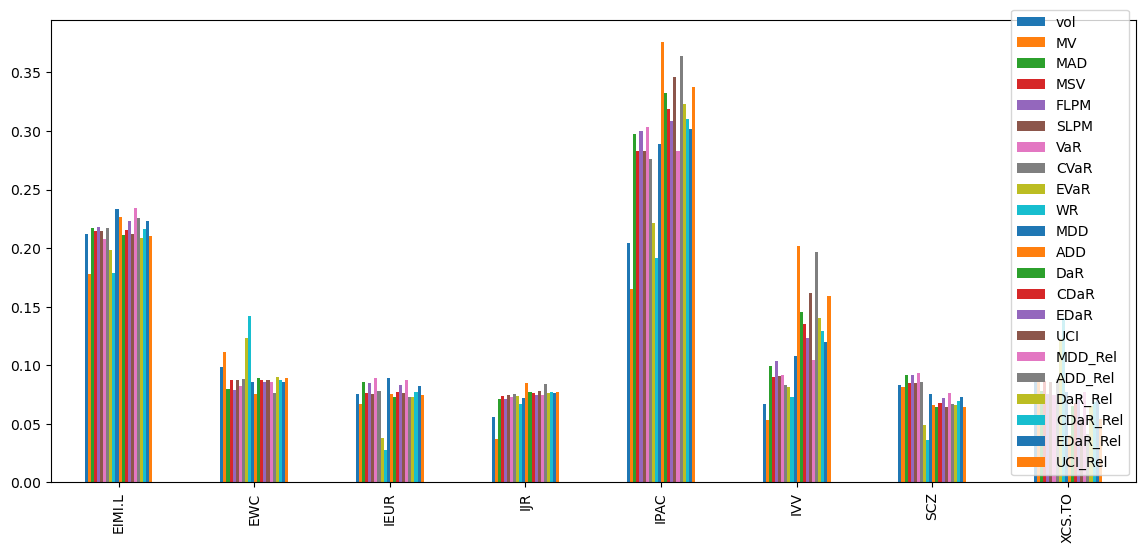

In [16]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)
plt.legend(loc='lower right')